In [1]:
from mnist import MNIST # Hand Written number Dataset
import random # random number generator module
import numpy as np # numpy Module

mndata = MNIST('Samples/')

train_images, train_labels = mndata.load_training()
X_test, y_test = mndata.load_testing()
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
train_images = np.asarray(train_images)
train_labels= np.asarray(train_labels)
print(train_images.shape,"\n",train_labels.shape, "\n", X_test.shape,"\n", y_test)

(60000, 784) 
 (60000,) 
 (10000, 784) 
 [7 2 1 ... 4 5 6]


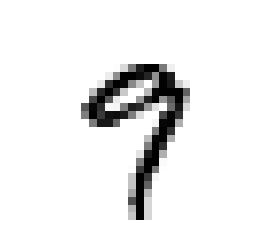

9


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = train_images[36500] #pulls one number from dataset, 728 data floats
some_digit_image = some_digit.reshape(28,28) #shapes data to 28X28 array

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
#prints array plot
plt.axis("off")
plt.show()
print(train_labels[36500])#prints label

In [3]:
shuffle_index = np.random.permutation(60000) #60,000 random numbers
X_train, y_train = train_images[shuffle_index], train_labels[shuffle_index]
#shuffled trained datasets

In [ ]:
y_train_9 = (y_train ==9)# true/false array for 9
y_test_9 = (y_test == 9)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42, max_iter = 50000, tol=None)
sgd_clf.fit(X_train, y_train_9) #fits Stochastic Gradient Descent model to Y_train_9
sgd_clf.predict([some_digit])  #prints prediction


array([False])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold (n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print (n_correct/len(y_pred))
    

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, scoring = "accuracy")


from sklearn.base import BaseEstimator
class Never5Classifier (BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_9, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)


from sklearn.metrics import confusion_matrix # shows how many numbers are classified correctly
confusion_matrix(y_train_9, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score (y_train_9, y_train_pred)) #prints precision
print(recall_score(y_train_9, y_train_pred)) # prints recall

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred) #creates f1 score

In [ ]:
y_scores = sgd_clf.decision_function([some_digit]) # gets the decision function for some number
print(y_scores) #prints scores for decision function

threshold = 0 #sets threshold

y_some_digit_pred =(y_scores > threshold) #true/false array based on thresholds value

print(y_some_digit_pred)#prints true/false

#update y_scores to cross validation prediction
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3, method = "decision_function")

from sklearn.metrics import precision_recall_curve

#gets the precisions, recalls, thresholds measurements for the recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

#plots the precision against the thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label ="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
y_train_pred_90 = (y_scores > 2000)
print(y_scores)
print(len(y_train_pred_90))
print (precision_score (y_train_9, y_train_pred_90))

print (recall_score(y_train_9, y_train_pred_90))